<div style="border-radius: 10px;
            border: 2px solid #0b0265;
           background-color: #e8efff;
           font-size: 24px;
           letter-spacing: 0.5px;
            text-align: center;
           padding: 20px;">

<h1 style="color: #0b0265; font-weight: bold; font-family: Arial, sans-serif;">Customer Churn Analysis</h1>
<h3 style="color: #0b0265; font-weight: bold; font-style: italic; font-family: Arial, sans-serif;"></h3>

</div>

### Problem Statement

The telecom industry faces challenges related to customer churn, which significantly impacts revenue and profitability. The objective of this project is to analyze customer churn in a telecom company and develop strategies to mitigate it. By leveraging oversampling techniques, we aim to address class imbalance in the dataset and improve the performance of our predictive models.

### Data Dictionary

- **customerID**: Unique identifier for each customer
- **gender**: Gender of the customer (Male/Female)
- **SeniorCitizen**: Indicates if the customer is a senior citizen (1: Yes, 0: No)
- **Partner**: Indicates if the customer has a partner (Yes/No)
- **Dependents**: Indicates if the customer has dependents (Yes/No)
- **tenure**: Number of months the customer has stayed with the company
- **PhoneService**: Indicates if the customer has a phone service (Yes/No)
- **MultipleLines**: Indicates if the customer has multiple lines (Yes/No/No phone service)
- **InternetService**: Type of internet service subscribed by the customer (DSL, Fiber optic, No)
- **OnlineSecurity**: Indicates if the customer has online security service (Yes/No/No internet service)
- **OnlineBackup**: Indicates if the customer has online backup service (Yes/No/No internet service)
- **DeviceProtection**: Indicates if the customer has device protection service (Yes/No/No internet service)
- **TechSupport**: Indicates if the customer has tech support service (Yes/No/No internet service)
- **StreamingTV**: Indicates if the customer has streaming TV service (Yes/No/No internet service)
- **StreamingMovies**: Indicates if the customer has streaming movies service (Yes/No/No internet service)
- **Contract**: Type of contract (Month-to-month, One year, Two year)
- **PaperlessBilling**: Indicates if the customer opted for paperless billing (Yes/No)
- **PaymentMethod**: Payment method used by the customer (Electronic check, Mailed check, Bank transfer, Credit card)
- **MonthlyCharges**: Monthly charges incurred by the customer
- **TotalCharges**: Total charges incurred by the customer
- **Churn**: Indicates if the customer churned (Yes/No)

This dataset provides a comprehensive view of customer attributes and their subscription details. The goal is to utilize this data to build predictive models that can accurately identify customers at risk of churn, allowing the company to implement targeted retention strategies and improve customer satisfaction.


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#-------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#-------------------------------------
from scipy.stats import shapiro

#-------------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#-------------------------------------
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc

#-------------------------------------
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from statsmodels.stats.outliers_influence import variance_inflation_factor

#-------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

#------------------------------------- 
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, RandomOverSampler

#-------------------------------------
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")


C:\Users\faisa\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### loading the data 



In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head().style.background_gradient(cmap='cool')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700000,151.65,Yes


# High level Overview of the Data

In [3]:
from tabulate import tabulate

def explore_data(data):
    operations = [
        ("Data Info", data.info()),
        ("Size", data.size),
        ("Shape", data.shape),
        ("Column-wise Missing Values", data.isnull().sum().to_frame()),
        ("Duplicates", data.duplicated().sum()),
        ("Data Types", data.dtypes.to_frame()),
        ("Object Types", data.select_dtypes(include='object').columns),
        ("Data Description", data.describe())
    ]
    
    # Replace "No Data" with 0 for missing and duplicated entries
    for i, (title, result) in enumerate(operations):
        if isinstance(result, int) and result == 0:
            operations[i] = (title, "0")
        elif isinstance(result, pd.DataFrame) and result.empty:
            operations[i] = (title, "0")
    
    # Print results in tabular format
    print(tabulate(operations, headers=["Operation", "Result"], tablefmt="fancy_grid"))

# Example usage:
explore_data(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Overview Insights:

- **Data Info**: The dataset consists of 7043 entries with 21 columns, including customer information such as gender, senior citizenship, partner, tenure, services subscribed, payment details, and churn status.
  
- **Size**: The total size of the dataset is 147903.
  
- **Shape**: The dataset has 7043 rows and 21 columns.
  
- **Column-wise Missing Values**: There are no missing values in any of the columns.
  
- **Duplicates**: There are no duplicated rows in the dataset.
  
- **Data Types**: The dataset contains a mix of data types, including integers, floats, and objects. Most columns are categorical, while a few are numerical.
  
- **Object Types**: The object type columns include customerID, gender, partner, dependents, phone service, multiple lines, internet service, online security, online backup, device protection, tech support, streaming TV, streaming movies, contract, paperless billing, payment method, total charges, and churn status.

###  Actions Suggested  Before Deep Diving Further :

- Since there are no missing values or duplicates, no further cleaning is required for these issues.
- The 'TotalCharges' column is of object type instead of numerical. Convert it to float if needed for analysis.
- Explore the distribution of numerical features to identify any outliers.
- Analyze the distribution of categorical features to understand the frequency of different categories.
- Consider encoding categorical variables for model building.
- Explore the relationship between independent variables and the target variable ('Churn') through visualization and statistical analysis.
- Split the dataset into training and testing sets for model development.


In [4]:
# dropping Customer ID as it is of no use in our Statement
data.drop(['customerID'], axis=1, inplace=True)

In [5]:
# checking Data Types 
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# corecting Data type of TotalCharges
# Replace empty strings in 'TotalCharges' column with NaN values
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan,regex=True)

# Convert 'TotalCharges' column to numeric type
data['TotalCharges'] = data['TotalCharges'].astype('float')

# Check for missing values after conversion
print(data.isnull().sum())

# Display dataset information after dropping missing values
data.info()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   objec

5 point Summary

In [7]:
data.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000000,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,7043.000000,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
TotalCharges,7032.000000,2283.300441,2266.771362,18.800000,401.450000,1397.475000,3794.737500,8684.800000


Checking the Target Column

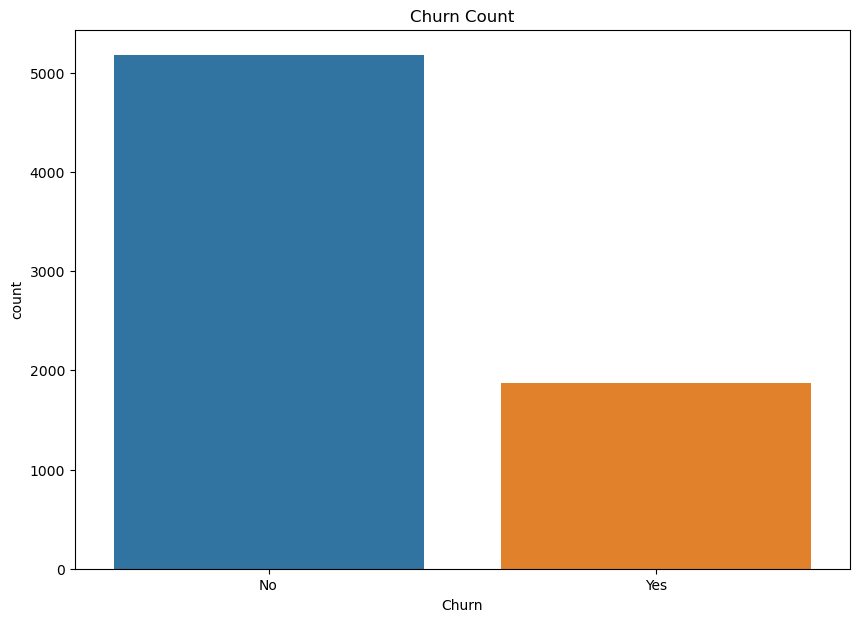

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(x="Churn",data=data)
plt.xticks()
plt.title("Churn Count")
plt.show()
data.Churn.value_counts()


### Churn Distribution

The churn distribution in the dataset is imbalanced, with significantly more instances labeled as 'No' (5163) compared to 'Yes' (1869).

### Imbalance Issue
Class imbalance can lead to biased model predictions, where the model may perform well in predicting the majority class ('No') but poorly in predicting the minority class ('Yes'). This imbalance needs to be addressed to ensure accurate predictions for both classes.

### Strategies to Overcome Imbalance
Several strategies can be implemented to address the class imbalance issue:

1. **Resampling Techniques**:
   - **Oversampling**: Increase the number of instances in the minority class by duplicating or generating synthetic samples.
   - **Undersampling**: Decrease the number of instances in the majority class by removing some samples.

2. **Algorithmic Techniques**:
   - Utilize algorithms that are robust to class imbalance, such as decision trees, random forests, and gradient boosting machines.
   - Adjust class weights in the model training process to penalize misclassifications in the minority class more.

3. **Ensemble Methods**:
   - Use ensemble techniques like bagging and boosting, which combine multiple models to improve predictive performance.
   - Implement techniques like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class.

4. **Evaluation Metrics**:
   - Instead of relying solely on accuracy, consider using evaluation metrics like precision, recall, F1-score, and ROC-AUC, which are more suitable for imbalanced datasets.

5. **Data Collection**:
   - Collect more data for the minority class to balance the distribution, if feasible.

6. **Feature Engineering**:
   - Explore feature engineering techniques to create new informative features that may help the model better distinguish between the classes.

### Addressing the Imbalance
This dataset highlights the common challenge of class imbalance in machine learning. Addressing this issue is crucial for developing accurate predictive models. Oversampling techniques, such as RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, and ADASYN, can help rebalance the class distribution and improve model performance. It's essential to select the most suitable strategy based on the dataset characteristics and model requirements.



## Seprating objects and numerical data types

In [9]:
categorical_feature = data.dtypes==object
final_categorical_feature = data.columns[categorical_feature].tolist()

#------------------------------------------------------
numeric_feature = data.dtypes!=object
final_numeric_feature = data.columns[numeric_feature].tolist()

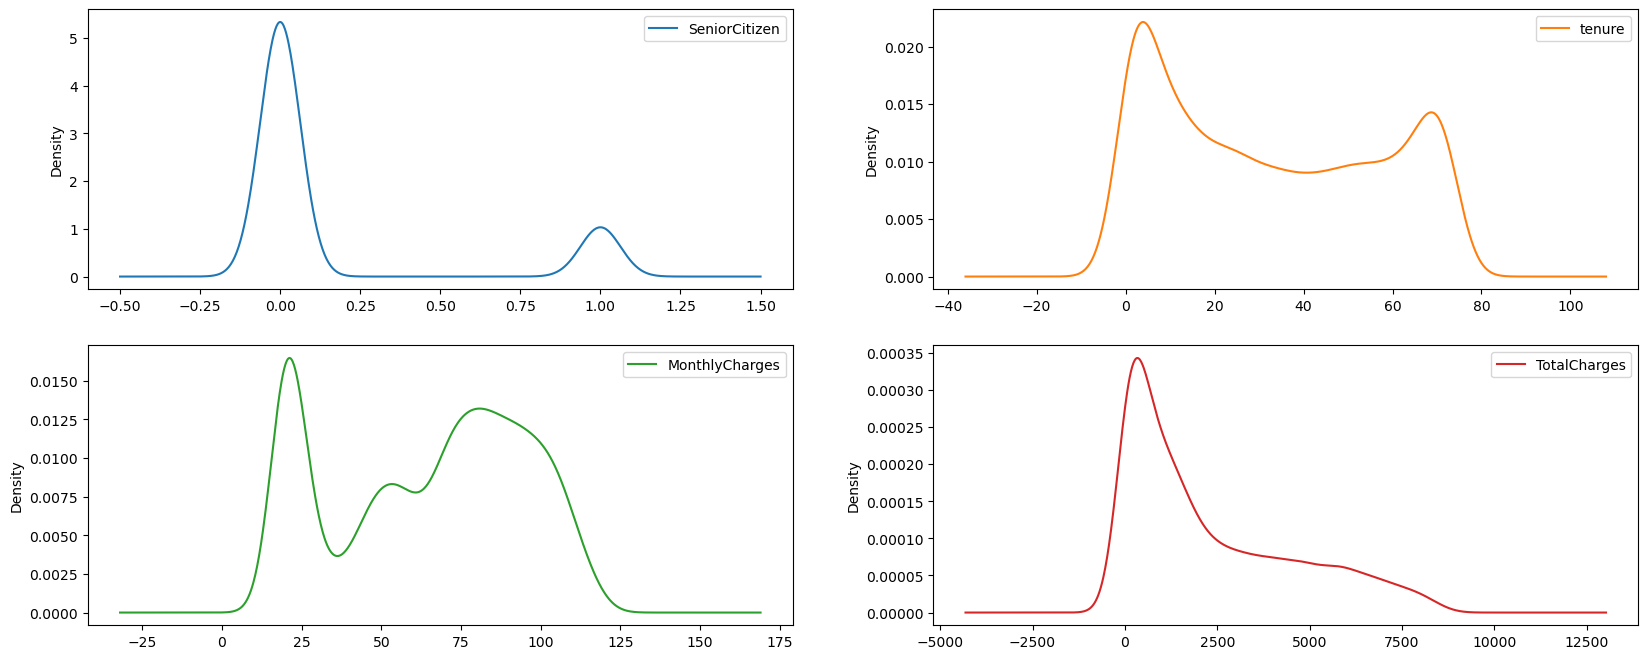

In [10]:
data[final_numeric_feature].plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize= (20,8))
plt.show()

In [11]:
# managing Outliers and other stuff
def outlier_detect(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    return df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))]

# ----------------------------------------------
def outlier_detect_normal(df, col):
    m = df[col].mean()
    s = df[col].std()
    return df[((df[col]-m)/s).abs()>3]

# ----------------------------------------------
def lower_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = df[(df[col] < (q1_col - 1.5 * iqr_col))]
    return lower

# ----------------------------------------------
def upper_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    upper = df[(df[col] > (q3_col + 1.5 * iqr_col))]
    return upper

# ----------------------------------------------
def preprocess(df, col):
    print("************************* {} *************************\n".format(col))
    print("lower outlier: {} ****** upper outlier: {}\n".format(lower_outlier(df,col).shape[0], upper_outlier(df,col).shape[0]))
    plt.figure(figsize=(8,5))
    df[col].plot(kind='box', subplots=True, sharex=False, vert=False)
    plt.show()
    

# ----------------------------------------------
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
def RandomSearch_Tune(model, Data, X, y, params):
    
    clf = RandomizedSearchCV(model, params, scoring ='accuracy', cv = CV, n_jobs=-1)
    clf.fit(X, y)
    
    print("best score is :" , clf.best_score_)
    print("best estimator is :" , clf.best_estimator_)
    print("best Params is :" , clf.best_params_)
    
    return (clf.best_score_)

# ----------------------------------------------
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [12]:
# Iterate through each column and check data type
for col in data.columns:
    dtype = data[col].dtype
    print(f"Column '{col}' has data type: {dtype}")


Column 'gender' has data type: object
Column 'SeniorCitizen' has data type: int64
Column 'Partner' has data type: object
Column 'Dependents' has data type: object
Column 'tenure' has data type: int64
Column 'PhoneService' has data type: object
Column 'MultipleLines' has data type: object
Column 'InternetService' has data type: object
Column 'OnlineSecurity' has data type: object
Column 'OnlineBackup' has data type: object
Column 'DeviceProtection' has data type: object
Column 'TechSupport' has data type: object
Column 'StreamingTV' has data type: object
Column 'StreamingMovies' has data type: object
Column 'Contract' has data type: object
Column 'PaperlessBilling' has data type: object
Column 'PaymentMethod' has data type: object
Column 'MonthlyCharges' has data type: float64
Column 'TotalCharges' has data type: float64
Column 'Churn' has data type: object


In [13]:
print("Mode: {}".format(data.TotalCharges.mode()))
print("Mean: {}".format(data.TotalCharges.mean()))
print("Median: {}".format(data.TotalCharges.median()))

Mode: 0    20.2
Name: TotalCharges, dtype: float64
Mean: 2283.3004408418656
Median: 1397.475


In [14]:
data['TotalCharges'] = data['TotalCharges'].fillna(data.TotalCharges.median())

In [15]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
Q1 = data[final_numeric_feature].quantile(0.25)
Q3 = data[final_numeric_feature].quantile(0.75)
IQR = Q3 - Q1

In [17]:
for i in range(len(final_numeric_feature)):
    stat,p = shapiro(data[final_numeric_feature[i]])
    print(final_numeric_feature[i])
    print('P_value=%.3f' % (p))
    print("*******************************")

SeniorCitizen
P_value=0.000
*******************************
tenure
P_value=0.000
*******************************
MonthlyCharges
P_value=0.000
*******************************
TotalCharges
P_value=0.000
*******************************


************************* SeniorCitizen *************************

lower outlier: 0 ****** upper outlier: 1142



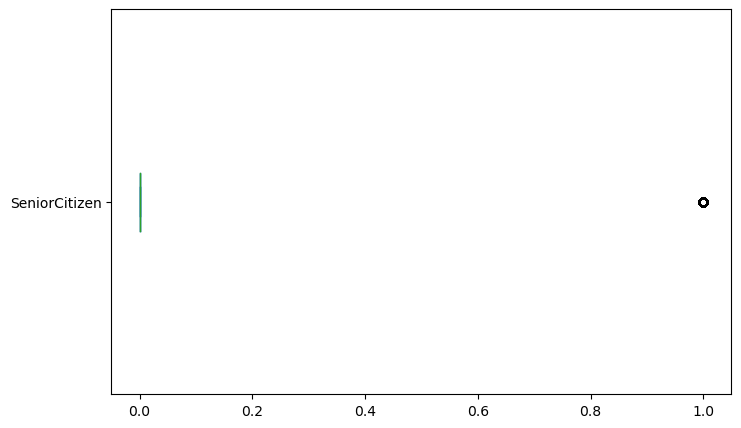

************************* tenure *************************

lower outlier: 0 ****** upper outlier: 0



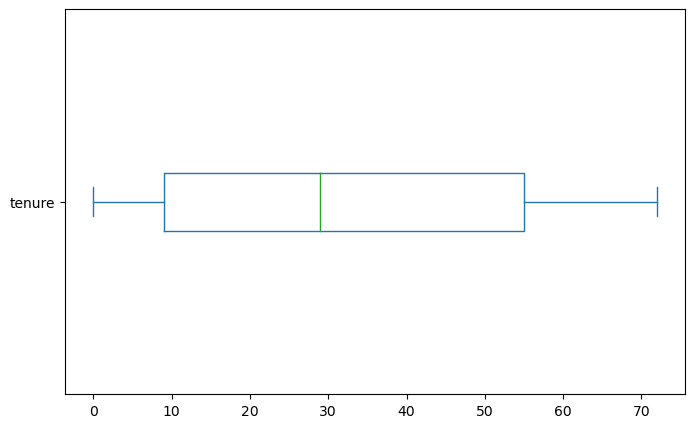

************************* MonthlyCharges *************************

lower outlier: 0 ****** upper outlier: 0



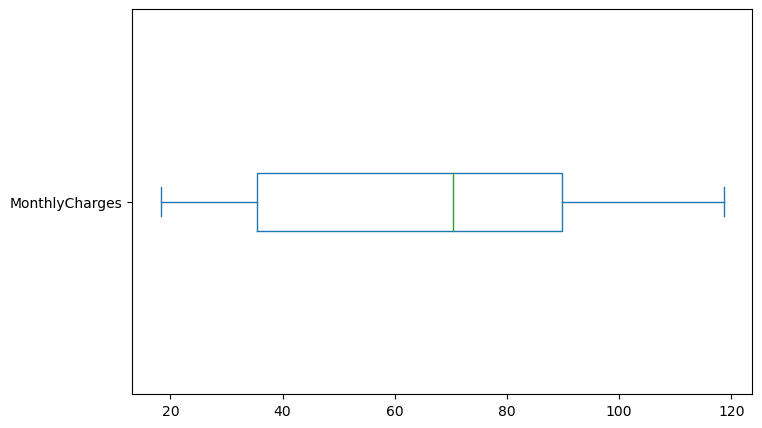

************************* TotalCharges *************************

lower outlier: 0 ****** upper outlier: 0



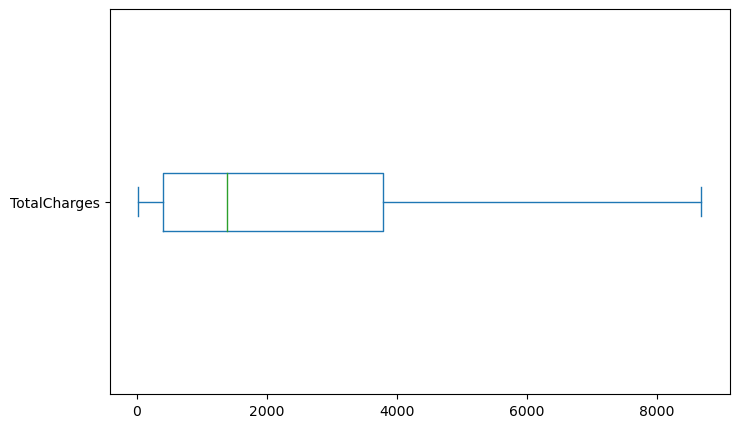

In [18]:
for i in range(len(final_numeric_feature)):
    preprocess(data[final_numeric_feature], final_numeric_feature[i])

In [19]:
for i in range(len(final_numeric_feature)):
    print("IQR => {}: {}".format(final_numeric_feature[i],(outlier_detect(data[final_numeric_feature],final_numeric_feature[i]).shape[0])))
    print("********************************")

IQR => SeniorCitizen: 1142
********************************
IQR => tenure: 0
********************************
IQR => MonthlyCharges: 0
********************************
IQR => TotalCharges: 0
********************************


In [20]:
for i in range(len(final_categorical_feature)):
    print("\n************ {} ************".format(final_categorical_feature[i]))
    print(data[final_categorical_feature[i]].unique())


************ gender ************
['Female' 'Male']

************ Partner ************
['Yes' 'No']

************ Dependents ************
['No' 'Yes']

************ PhoneService ************
['No' 'Yes']

************ MultipleLines ************
['No phone service' 'No' 'Yes']

************ InternetService ************
['DSL' 'Fiber optic' 'No']

************ OnlineSecurity ************
['No' 'Yes' 'No internet service']

************ OnlineBackup ************
['Yes' 'No' 'No internet service']

************ DeviceProtection ************
['No' 'Yes' 'No internet service']

************ TechSupport ************
['No' 'Yes' 'No internet service']

************ StreamingTV ************
['No' 'Yes' 'No internet service']

************ StreamingMovies ************
['No' 'Yes' 'No internet service']

************ Contract ************
['Month-to-month' 'One year' 'Two year']

************ PaperlessBilling ************
['Yes' 'No']

************ PaymentMethod ************
['Electronic check' '

In [21]:
df_dummy = pd.get_dummies(data, prefix=['Contract', 'PaymentMethod'],columns=['Contract', 'PaymentMethod'], drop_first=True)
df_dummy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Yes,29.85,29.85,No,False,False,False,True,False
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,56.95,1889.50,No,True,False,False,False,True
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Yes,53.85,108.15,Yes,False,False,False,False,True
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,42.30,1840.75,No,True,False,False,False,False
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Yes,70.70,151.65,Yes,False,False,False,True,False


In [22]:
final_categorical_feature.remove('Contract')
final_categorical_feature.remove('PaymentMethod')

In [23]:
le = LabelEncoder() 
df_dummy[final_categorical_feature] = df_dummy[final_categorical_feature].apply(lambda col: le.fit_transform(col)) 
df_dummy.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,0,2,...,0,1,29.85,29.85,0,False,False,False,True,False
1,1,0,0,0,34,1,0,0,2,0,...,0,0,56.95,1889.50,0,True,False,False,False,True
2,1,0,0,0,2,1,0,0,2,2,...,0,1,53.85,108.15,1,False,False,False,False,True
3,1,0,0,0,45,0,1,0,2,0,...,0,0,42.30,1840.75,0,True,False,False,False,False
4,0,0,0,0,2,1,0,1,0,0,...,0,1,70.70,151.65,1,False,False,False,True,False


In [24]:
df_dummy.loc[data.duplicated()].shape

(22, 23)

In [25]:
df_dummy = df_dummy.drop_duplicates()
df_dummy.shape

(7021, 23)

<Axes: >

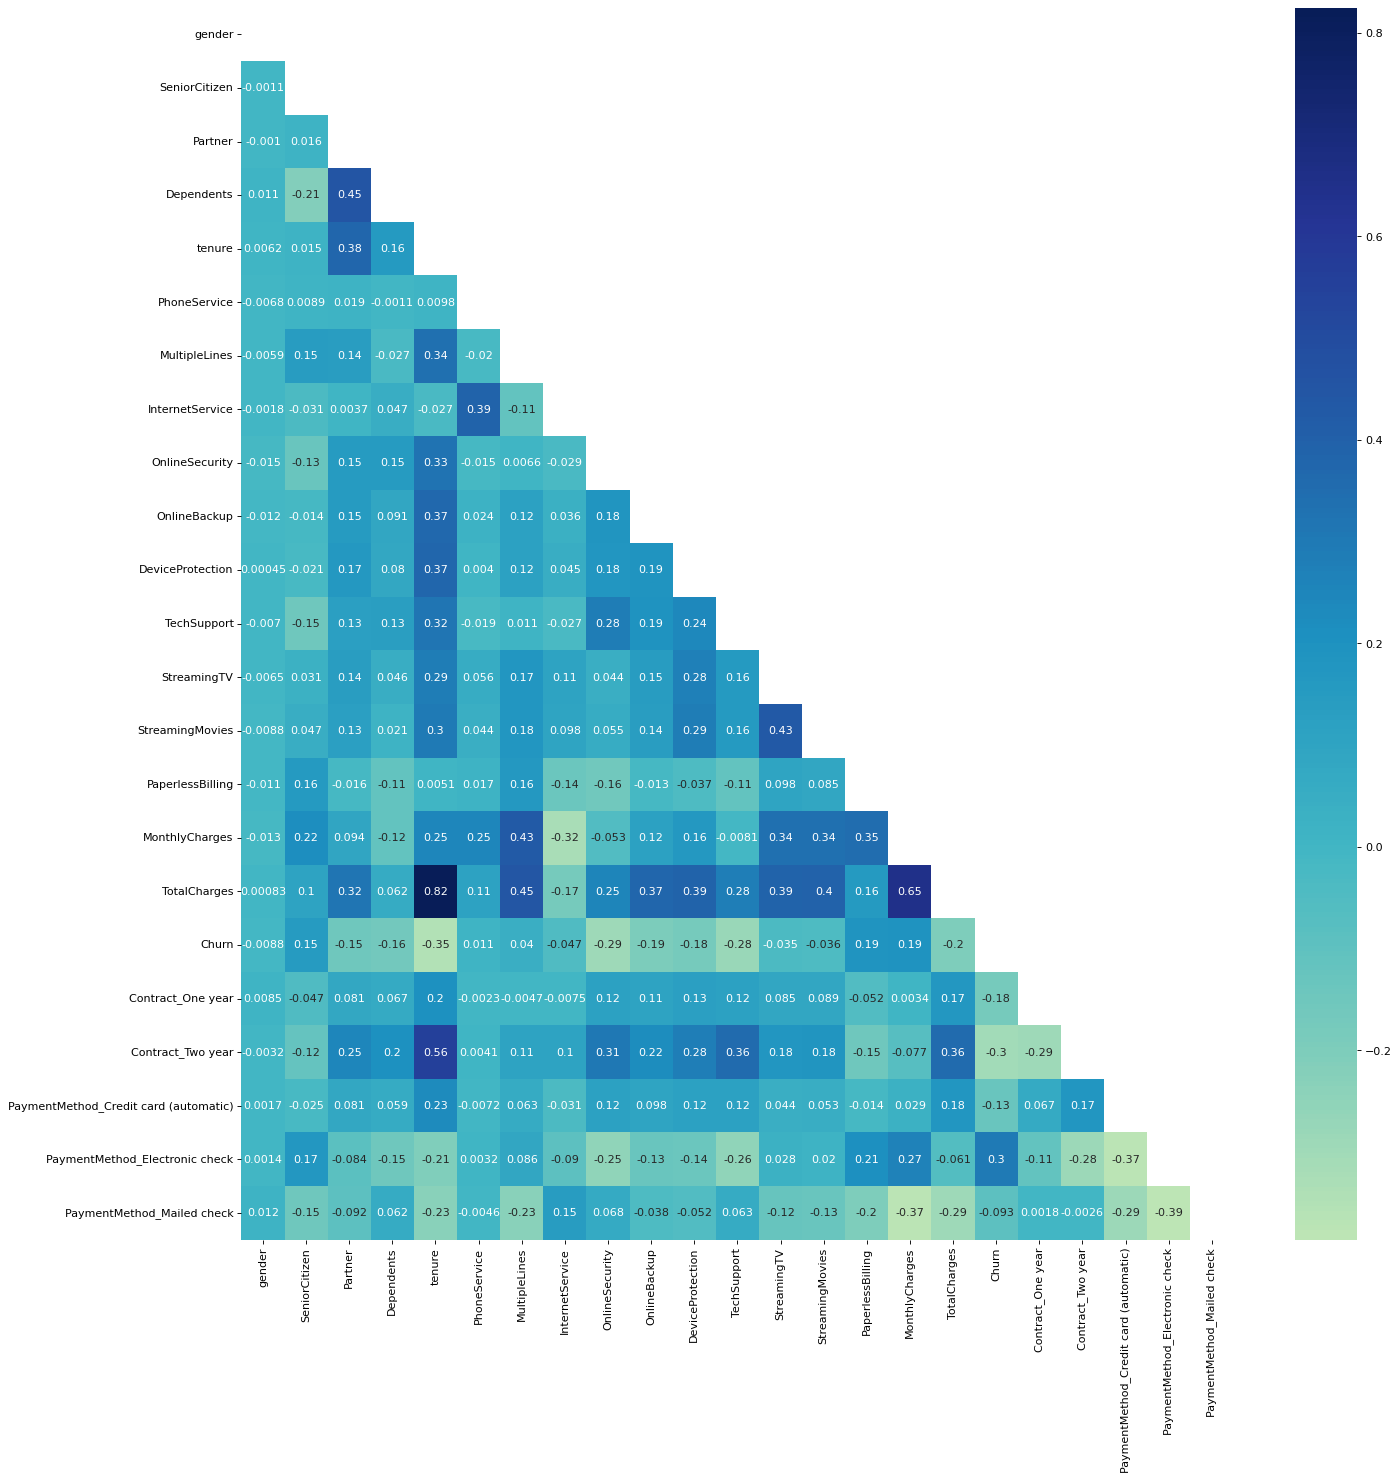

In [26]:
mask = np.triu(np.ones_like(df_dummy.corr()))
fig, ax = plt.subplots(figsize=(20,20),dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df_dummy.corr(), mask= mask, cmap="YlGnBu", annot = True, center = 0,annot_kws={"fontsize":10})

In [27]:
x = df_dummy.drop("Churn", axis = 1)
y = df_dummy['Churn']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =100 ,stratify=y, test_size = 0.2)
print(y_train.value_counts())

Churn
0    4131
1    1485
Name: count, dtype: int64


In [29]:
scale = MinMaxScaler()
col = x_train.columns

x_train[col] = scale.fit_transform(x_train[col])
x_test[col] = scale.transform(x_test[col])

In [30]:
x_train_randOverSample = x_train.copy()
y_train_randOverSample = y_train.copy()

In [31]:
print("Before OverSampling- counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling- counts of label '0': {} \n".format(sum(y==0)))
print("*******************************************************************")

randOverSample = RandomOverSampler(random_state=100,)
x_train_randOverSample, y_train_randOverSample = randOverSample.fit_resample(x_train_randOverSample, y_train_randOverSample.ravel())

print('After OverSampling with RandomOverSampler- x_train: {}'.format(x_train_randOverSample.shape))
print('After OverSampling with RandomOverSampler- y_train: {} \n'.format(y_train_randOverSample.shape))

print("After OverSampling with RandomOverSampler- counts of label '1': {}".format(sum(y_train_randOverSample==1)))
print("After OverSampling with RandomOverSampler- counts of label '0': {}".format(sum(y_train_randOverSample==0)))

Before OverSampling- counts of label '1': 1857
Before OverSampling- counts of label '0': 5164 

*******************************************************************
After OverSampling with RandomOverSampler- x_train: (8262, 22)
After OverSampling with RandomOverSampler- y_train: (8262,) 

After OverSampling with RandomOverSampler- counts of label '1': 4131
After OverSampling with RandomOverSampler- counts of label '0': 4131


In [32]:
sfs_randOverSample = SFS(GradientBoostingClassifier(n_estimators=100, random_state=0),
          k_features = 9,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = CV,
          n_jobs= -1).fit(x_train_randOverSample, y_train_randOverSample)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    9.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:   12.5s finished

[2024-04-24 10:04:36] Features: 1/9 -- score: 0.6844585435264426[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    9.9s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   11.4s finished

[2024-04-24 10:04:47] Features: 2/9 -- score: 0.7265753869846671[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   12.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   13.3s finished

[2024-04-24 10:05:01] Features: 3/9 -- score: 0.7541719977397225[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | 

In [33]:
print("Feature Names: ",sfs_randOverSample.k_feature_names_)
print("*****************************************")
print("Score: ", sfs_randOverSample.k_score_)

Feature Names:  ('tenure', 'InternetService', 'OnlineBackup', 'TechSupport', 'MonthlyCharges', 'TotalCharges', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check')
*****************************************
Score:  0.7807997927103127


In [34]:
x_train_new_randOverSample = x_train_randOverSample[['tenure',
                                                     'InternetService',
                                                     'OnlineBackup',
                                                     'TechSupport',
                                                     'MonthlyCharges',
                                                     'Contract_One year',
                                                     'Contract_Two year',
                                                     'PaymentMethod_Electronic check']]

x_test_new_randOverSample = x_test[['tenure',
                                     'InternetService',
                                     'OnlineBackup',
                                     'TechSupport',
                                     'MonthlyCharges',
                                     'Contract_One year',
                                     'Contract_Two year',
                                     'PaymentMethod_Electronic check']]

In [35]:
checkVIF(x_train_new_randOverSample).reset_index(drop=True)

,Features,VIF
0,tenure,5.40
1,MonthlyCharges,3.88
2,Contract_Two year,2.63
3,OnlineBackup,2.15
4,TechSupport,1.97
5,PaymentMethod_Electronic check,1.96
6,InternetService,1.90
7,Contract_One year,1.78


In [36]:
DT = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=3, random_state=0)
cross_val_DT = cross_val_score(DT, x_train_new_randOverSample, y_train_randOverSample , cv = CV, scoring = 'accuracy' ) 
cross_val_DT_f1 = cross_val_score(DT, x_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                  scoring = 'f1') 

# --------------------------------------------------------------------------
RF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2,min_samples_split=6, n_estimators=25, random_state=0)
cross_val_RF = cross_val_score(RF, x_train_new_randOverSample, y_train_randOverSample , cv = CV, scoring = 'accuracy') 
cross_val_RF_f1 = cross_val_score(RF, x_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                  scoring = 'f1') 

# --------------------------------------------------------------------------
ET = ExtraTreesClassifier(max_depth=4, max_features='log2', min_samples_leaf=2,min_samples_split=6, 
                          n_estimators=25, random_state=0)
cross_val_ET = cross_val_score(ET, x_train_new_randOverSample, y_train_randOverSample , cv = CV, scoring = 'accuracy') 
cross_val_ET_f1 = cross_val_score(ET, x_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                  scoring = 'f1') 

# --------------------------------------------------------------------------
MLP = MLPClassifier(activation='tanh', hidden_layer_sizes=20, learning_rate_init=0.025, max_iter=100, random_state=0)
cross_val_MLP = cross_val_score(MLP, x_train_new_randOverSample, y_train_randOverSample , cv = CV, scoring = 'accuracy') 
cross_val_MLP_f1 = cross_val_score(MLP, x_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                   scoring = 'f1') 

# --------------------------------------------------------------------------
GB = GradientBoostingClassifier(loss='exponential', max_depth=4, min_samples_leaf=4, random_state=0)
cross_val_GB = cross_val_score(GB, x_train_new_randOverSample, y_train_randOverSample , cv = CV, scoring = 'accuracy') 
cross_val_GB_f1 = cross_val_score(GB, x_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                  scoring = 'f1') 

# --------------------------------------------------------------------------
LR = LogisticRegression(C=10, random_state=0, solver='newton-cg')
cross_val_LR = cross_val_score(LR, x_train_new_randOverSample, y_train_randOverSample ,cv = CV, scoring = 'accuracy') 
cross_val_LR_f1 = cross_val_score(LR, x_train_new_randOverSample, y_train_randOverSample ,cv = CV, 
                               scoring = 'f1') 

# --------------------------------------------------------------------------
XGB = XGBClassifier(learning_rate_init= 0.2, max_depth= 5, n_estimators= 300, n_jobs=-1, random_state = 0,
                    min_child_weight= 1, colsample_bytree= 0.8, gamma= 0.5)
cross_val_XGB = cross_val_score(XGB, x_train_new_randOverSample, y_train_randOverSample ,cv = CV, scoring = 'accuracy') 
cross_val_XGB_f1 = cross_val_score(XGB, x_train_new_randOverSample, y_train_randOverSample ,cv = CV, 
                                   scoring = 'f1') 

# --------------------------------------------------------------------------
KNN = KNeighborsClassifier(n_neighbors=19)
cross_val_KNN = cross_val_score(KNN, x_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                scoring = 'accuracy') 
cross_val_KNN_f1 = cross_val_score(KNN, x_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                   scoring = 'f1') 

# --------------------------------------------------------------------------
LGBM = LGBMClassifier(boosting_type='goss', learning_rate=0.2, max_depth=3,min_child_samples=15, 
                      n_estimators=300, num_leaves=20, random_state=0, reg_alpha=0)
cross_val_LGBM = cross_val_score(LGBM, x_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                 scoring = 'accuracy') 
cross_val_LGBM_f1 = cross_val_score(LGBM, x_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                    scoring = 'f1') 

# --------------------------------------------------------------------------
estimators = [('DT', DT),
              ('RF', RF),
              ('MLP', MLP),
              ('ET', ET),
              ('LR', LR),
              ('KNN', KNN),
              ('GB', GB),
              ('LGBM', LGBM)
             ]
SC_tune = StackingClassifier(estimators = estimators, final_estimator = MLP)
cross_val_SC_tune = cross_val_score(SC_tune, x_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                    scoring = 'accuracy' ) 
cross_val_SC_tune_f1 = cross_val_score(SC_tune, x_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                    scoring = 'f1' ) 

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 3718, number of negative: 3717
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 7435, number of used features: 8
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pav

In [37]:
compare_models = [('Decision Tree', cross_val_DT.mean(),cross_val_DT_f1.mean(),''),
                  ('Random Forest', cross_val_RF.mean(),cross_val_RF_f1.mean(), ''),
                  ('Neural Network', cross_val_MLP.mean(),cross_val_MLP_f1.mean(),''),
                  ('Extra Tree', cross_val_ET.mean(),cross_val_ET_f1.mean(), ''),
                  ('GradientBoosting', cross_val_GB.mean(),cross_val_GB_f1.mean(),''),
                  ('Logistic Regression', cross_val_LR.mean(),cross_val_LR_f1.mean(),''),
                  ('KNN', cross_val_KNN.mean(), cross_val_KNN_f1.mean(), ''),
                  ('XGBC', cross_val_XGB.mean(), cross_val_XGB_f1.mean(), ''),
                  ('LGBM', cross_val_LGBM.mean(), cross_val_LGBM_f1.mean(), ''),
                  ('Stacking', cross_val_SC_tune.mean(), cross_val_SC_tune_f1.mean(), 'The Best Model')]

In [38]:
predict = pd.DataFrame(data = compare_models, columns=['Model','Cross_validation_mean(accuracy)', 'Cross_validation_mean(f1_score)', 'Description'])
predict.style.background_gradient(cmap='YlGn')

,Model,Cross_validation_mean(accuracy),Cross_validation_mean(f1_score),Description
0,Decision Tree,0.811061,0.816981,
1,Random Forest,0.846887,0.856031,
2,Neural Network,0.765791,0.772138,
3,Extra Tree,0.753448,0.774150,
4,GradientBoosting,0.783826,0.792224,
5,Logistic Regression,0.749577,0.759140,
6,KNN,0.763492,0.775418,
7,XGBC,0.784311,0.793817,
8,LGBM,0.778623,0.787482,
9,Stacking,0.871821,0.878257,The Best Model


In [39]:
SC_tune.fit(x_train_new_randOverSample, y_train_randOverSample)
y_test_pred_SC_tune = SC_tune.predict(x_test_new_randOverSample)
test_acc_SC_tune = accuracy_score(y_test, y_test_pred_SC_tune)

print("Test set Accuracy: ", test_acc_SC_tune)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 4131, number of negative: 4131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 8262, number of used features: 8
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pav

In [40]:
x_train_smote = x_train.copy()
y_train_smote = y_train.copy()